##  Load data using Image data loading from  keras

In [33]:
import keras.models.cloning
# Prepare your dataset here
from keras.optimizers import SGD
import tensorflow as tf
import  tensorflow as tf

trainig_directory=r'training/training'
training=tf.keras.utils.image_dataset_from_directory(
   trainig_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=43,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 900 files belonging to 5 classes.
Using 720 files for training.


split training set into training 80% and validation 20 %

In [34]:
validation=tf.keras.utils.image_dataset_from_directory(
   trainig_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=43,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False


)

Found 900 files belonging to 5 classes.
Using 180 files for validation.


In [35]:
testing_directory=r'testing/testing'
testing=tf.keras.utils.image_dataset_from_directory(
    testing_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 100 files belonging to 5 classes.


In [36]:
import tensorflow as tf
import keras
import keras
from keras.models import Model
from keras.applications import VGG16

In [37]:
from keras import Model
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics

In [38]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [39]:
import keras
# remove the top layer
model_vgg16=VGG16(include_top=False,weights="imagenet",input_shape=(128,128,3))
x=model_vgg16.get_layer('block2_pool').output
# add  3 fully connected layer
Conv2D_2=tf.keras.layers.Conv2D(64,(5,5),activation='relu')(x)
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2),
strides=(2, 2)) (Conv2D_2)
flatten=tf.keras.layers.Flatten(name="flatten")(pool_layer)
dense_layer=tf.keras.layers.Dense(32,activation="relu")(flatten)
dense_layer_1=tf.keras.layers.Dense(5,activation="softmax")(dense_layer)
#  set the output layer as block2_pool
the_base_model=Model(model_vgg16.input,dense_layer_1)

In [40]:
the_base_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

After architecture give  acceptable accuracy  that include conv2d and pool layer(maxpooling   with strides) to return the maximum after that apply flatten t convert multi-dimensional array into one dimensional  follow by dense layer with relu activation function and the last layer type of dense include the number of classes =5 and the activation function  type of softmax that suitable for our case  multi-classifier

In [41]:
from livelossplot import PlotLossesKeras

In [42]:
the_base_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics = ['accuracy'])

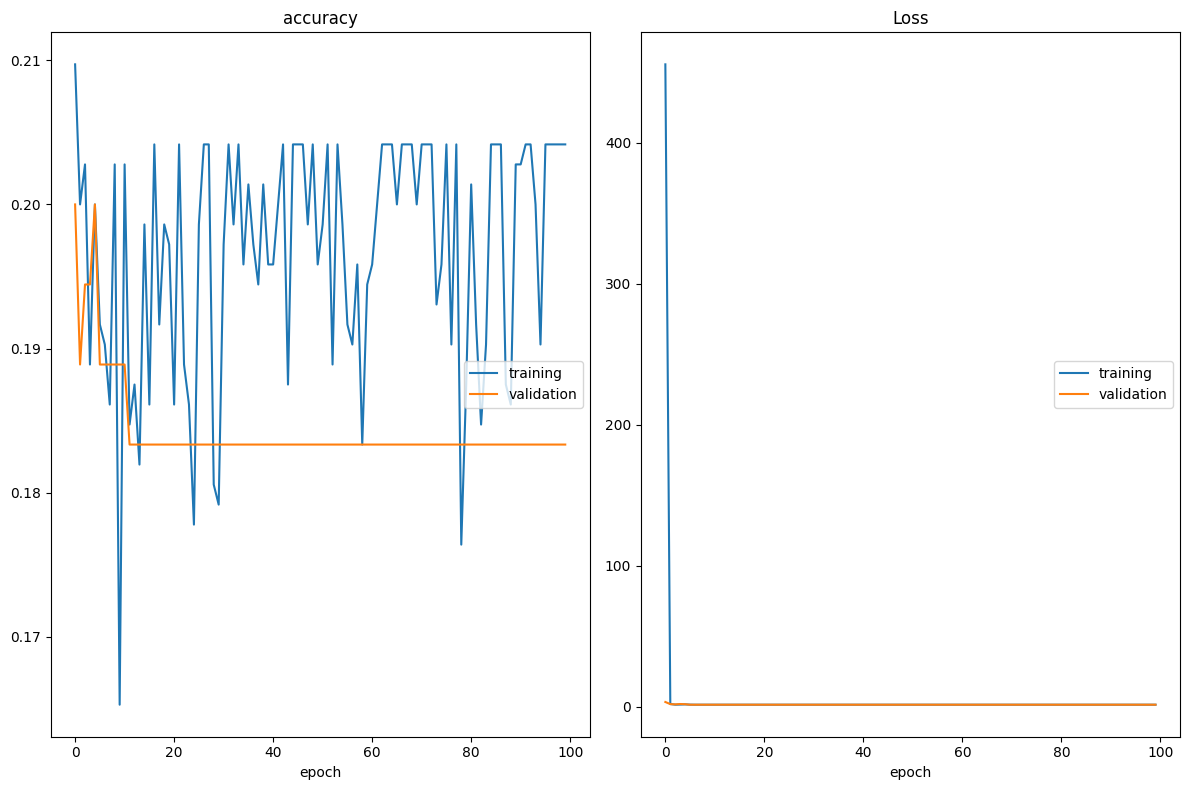

accuracy
	training         	 (min:    0.165, max:    0.210, cur:    0.204)
	validation       	 (min:    0.183, max:    0.200, cur:    0.183)
Loss
	training         	 (min:    1.609, max:  455.699, cur:    1.609)
	validation       	 (min:    1.610, max:    3.536, cur:    1.611)
23/23 [==============================] - 32s 1s/step - loss: 1.6091 - accuracy: 0.2042 - val_loss: 1.6114 - val_accuracy: 0.1833


In [43]:
the_base_model.fit(training, batch_size = 32, epochs = 100, validation_data = validation,callbacks=[PlotLossesKeras()])

## prediction on training and testing and validation

In [44]:
# function to get the true label of training , testing and validation
def get_labels (dataset):
    labels=[]
    for i in dataset:
      image,label=i
      for l in (label.numpy().argmax(axis=1)):#argmax for regression
       labels.append(l)
    return(labels)

In [45]:
ytrue_training=get_labels(training) # true label of training
ytrue_testing=get_labels(testing) # true label of testing
ytrue_validation=get_labels(validation) # true label of validation

In [46]:
pred_training=the_base_model.predict(training)

23/23 [==============================] - 7s 303ms/step


In [47]:
pred_testing=the_base_model.predict(testing)

4/4 [==============================] - 1s 224ms/step


In [48]:
pred_validation=the_base_model.predict(validation)

6/6 [==============================] - 2s 289ms/step


In [49]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def draw_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(confusion_matrix =cm).plot()
    print(classification_report(y_true, y_pred))
    plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.20      1.00      0.34       147
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       135

    accuracy                           0.20       720
   macro avg       0.04      0.20      0.07       720
weighted avg       0.04      0.20      0.07       720



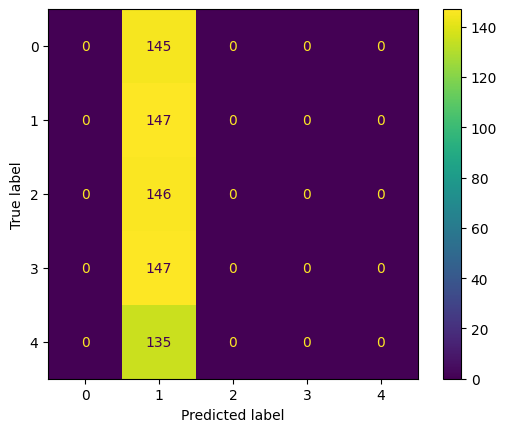

In [50]:
from sklearn.metrics import classification_report
draw_confusion_matrix(ytrue_training,pred_training.argmax(axis=1))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.20      1.00      0.33        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



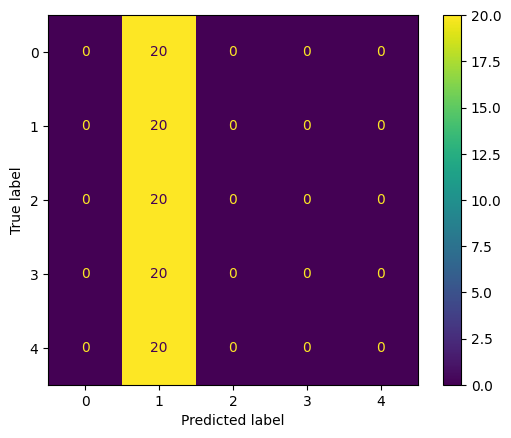

In [51]:
draw_confusion_matrix(ytrue_testing,pred_testing.argmax(axis=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.18      1.00      0.31        33
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        45

    accuracy                           0.18       180
   macro avg       0.04      0.20      0.06       180
weighted avg       0.03      0.18      0.06       180



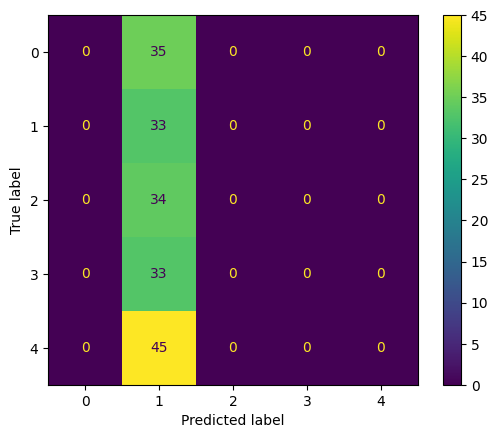

In [52]:
draw_confusion_matrix(ytrue_validation,pred_validation.argmax(axis=1))

In [53]:
#Write your code here
model_vgg16=VGG16(include_top=False,weights="imagenet",input_shape=(128,128,3))
x=model_vgg16.get_layer('block2_pool').output
Conv2D_2=tf.keras.layers.Conv2D(64,(5,5),activation='relu')(x)
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)) (Conv2D_2)
flatten=tf.keras.layers.Flatten(name="flatten")(pool_layer)
dense_layer=tf.keras.layers.Dense(128,activation="relu")(flatten)
dense_layer_1=tf.keras.layers.Dense(1,activation="linear")(dense_layer)
regression_model=Model(model_vgg16.input,dense_layer_1)

In [54]:
regression_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

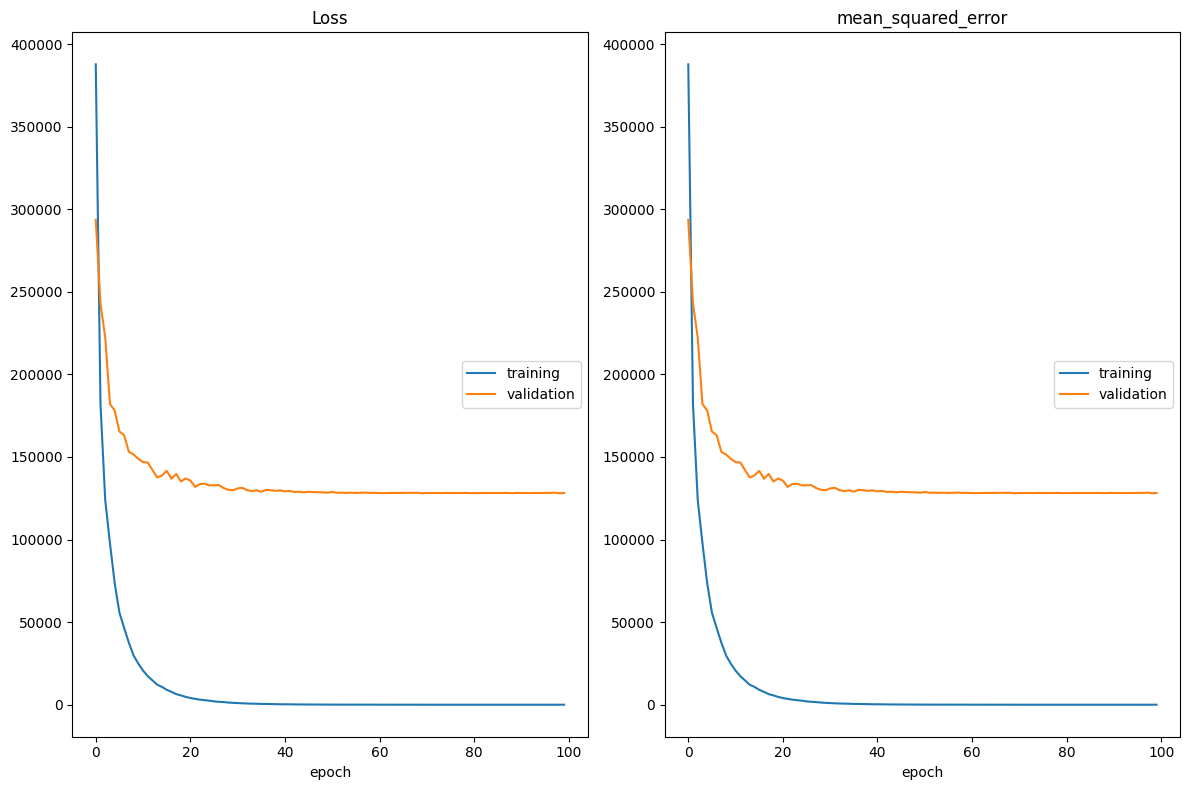

Loss
	training         	 (min:    0.540, max: 387680.562, cur:    5.064)
	validation       	 (min: 128005.133, max: 293528.188, cur: 128196.570)
mean_squared_error
	training         	 (min:    0.540, max: 387680.562, cur:    5.064)
	validation       	 (min: 128005.133, max: 293528.188, cur: 128196.570)
23/23 [==============================] - 34s 1s/step - loss: 5.0643 - mean_squared_error: 5.0643 - val_loss: 128196.5703 - val_mean_squared_error: 128196.5703


In [55]:
regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss ='mse', metrics =[tf.keras.metrics.MeanSquaredError()])
regression_model.fit(training, batch_size=32, epochs=100, validation_data=validation, callbacks=[PlotLossesKeras()])

In [56]:
import warnings
warnings.filterwarnings('ignore')
pred_training_regresssion=regression_model.predict(training)

23/23 [==============================] - 8s 329ms/step


In [57]:
pred_testing_regresssion=regression_model.predict(testing)

4/4 [==============================] - 1s 257ms/step


In [58]:
pred_validation_regresssion=regression_model.predict(validation)

6/6 [==============================] - 2s 323ms/step


              precision    recall  f1-score   support

           0       0.20      1.00      0.34       145
           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       135

    accuracy                           0.20       720
   macro avg       0.04      0.20      0.07       720
weighted avg       0.04      0.20      0.07       720



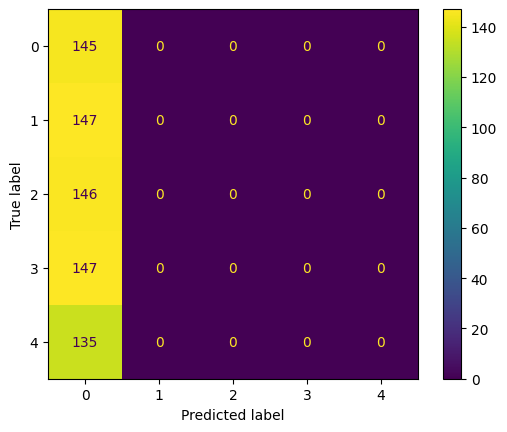

In [59]:
draw_confusion_matrix(ytrue_training,pred_training_regresssion.argmax(axis=1))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



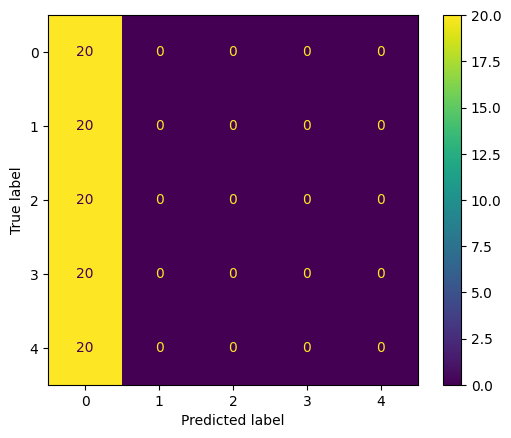

In [60]:
draw_confusion_matrix(ytrue_testing,pred_testing_regresssion.argmax(axis=1))

              precision    recall  f1-score   support

           0       0.19      1.00      0.33        35
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        45

    accuracy                           0.19       180
   macro avg       0.04      0.20      0.07       180
weighted avg       0.04      0.19      0.06       180



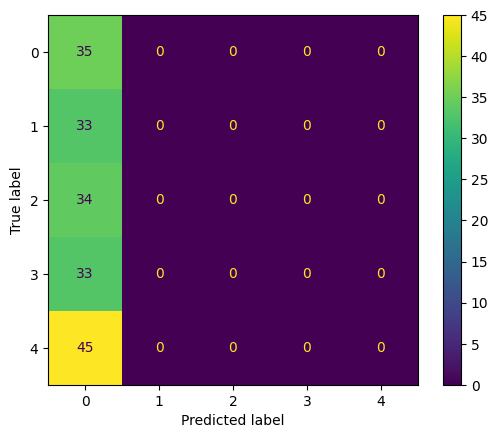

In [61]:
draw_confusion_matrix(ytrue_validation,pred_validation_regresssion.argmax(axis=1))




### From these results we can notice that the model be able to predict only the first class and can't detect the other classes,so these regression technique can't used with this case

## Data Augmentation  (in-place/on-the-fly data augmentation) that transform each image in the batch  and that  randomly transformed batch  will use the  randomly  transformed data( augmentation) is done at training time

In [67]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
import cv2
import os
import numpy as np
Training_dir=r'training/training'
aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")
for i in (os.listdir(Training_dir)):
    path=os.path.join(Training_dir,i)
    print(path)
    Training=[]
    for x in  os.listdir(path):
        new_path=os.path.join(path,x)
        img=cv2.imread(new_path)
        img=cv2.resize(img,(128,128))
        Training.append(img)
    Training=np.array(Training)
    generation = aug.flow(Training, batch_size=64,save_to_dir=path)
    for i in range(10):
        batch = generation.next()

training/training\1
training/training\2
training/training\3
training/training\4
training/training\6


Read image again after augmentation

In [74]:
trainig_directory=r'training/training'
training_augmentation=tf.keras.utils.image_dataset_from_directory(
   trainig_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=43,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 3918 files belonging to 5 classes.
Using 3135 files for training.


Here the Number  of images increase to 3920

In [75]:
validation_augmentation=tf.keras.utils.image_dataset_from_directory(
   trainig_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=43,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False


)

Found 3918 files belonging to 5 classes.
Using 783 files for validation.


 before augmentation the validation = 180 now  after augmentation  the validation =784

In [78]:
testing_directory=r'testing/testing'
testing_augmenation=tf.keras.utils.image_dataset_from_directory(
    testing_directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 100 files belonging to 5 classes.


In [79]:
model_vgg16=VGG16(include_top=False,weights="imagenet",input_shape=(128,128,3))
x=model_vgg16.get_layer('block2_pool').output
# add  3 fully connected layer
Conv2D_2=tf.keras.layers.Conv2D(64,(5,5),activation='relu')(x)
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2),
strides=(2, 2)) (Conv2D_2)
flatten=tf.keras.layers.Flatten(name="flatten")(pool_layer)
Regularization_layer=tf.keras.layers.Dropout(0.2)(flatten)
dense_layer=tf.keras.layers.Dense(250,activation="relu")(Regularization_layer)
Regularization_layer_2=tf.keras.layers.Dropout(0.2)(dense_layer)
dense_layer_1=tf.keras.layers.Dense(250,activation="relu")(Regularization_layer_2)
# Bacth normalization  layer is between output of a layer and  activation layer
bz= tf.keras.layers.BatchNormalization()(dense_layer_1)
dense_layer_2=tf.keras.layers.Dense(5,activation="softmax")(bz)
improved_model=Model(model_vgg16.input,dense_layer_2)

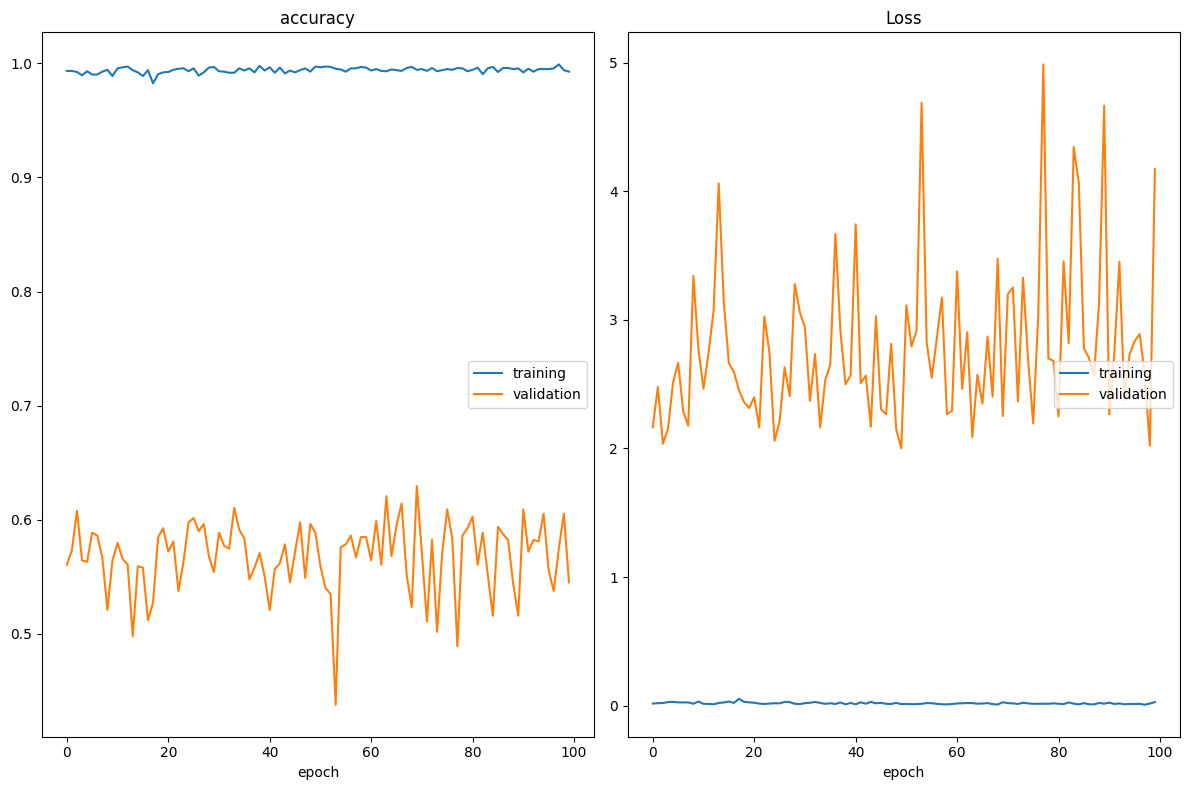

accuracy
	training         	 (min:    0.982, max:    0.999, cur:    0.993)
	validation       	 (min:    0.438, max:    0.630, cur:    0.545)
Loss
	training         	 (min:    0.007, max:    0.053, cur:    0.027)
	validation       	 (min:    2.001, max:    4.987, cur:    4.171)
98/98 [==============================] - 143s 1s/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 4.1713 - val_accuracy: 0.5453


In [ ]:
improved_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy',
                       metrics=['accuracy'])
improved_model.fit(training_augmentation, batch_size=32, epochs=100, validation_data=validation_augmentation, callbacks=[PlotLossesKeras()])

## Prediction on training and testing and validation

In [82]:
pred_training_improved_model = improved_model.predict(training_augmentation)
pred_testing_improved_model = improved_model.predict(testing)
pred_validation_improved_model = improved_model.predict(validation_augmentation)

25/25 [==============================] - 8s 315ms/step


## plot Confusion matrix

In [83]:
ytrue_training_augmented=get_labels(training_augmentation) # true label of training
ytrue_testing=get_labels(testing) # true label of testing
ytrue_validation_augmented=get_labels(validation_augmentation) # true label of validation

              precision    recall  f1-score   support

           0       0.19      0.19      0.19       612
           1       0.20      0.21      0.21       643
           2       0.22      0.20      0.21       625
           3       0.20      0.19      0.20       636
           4       0.18      0.18      0.18       619

    accuracy                           0.20      3135
   macro avg       0.20      0.20      0.20      3135
weighted avg       0.20      0.20      0.20      3135



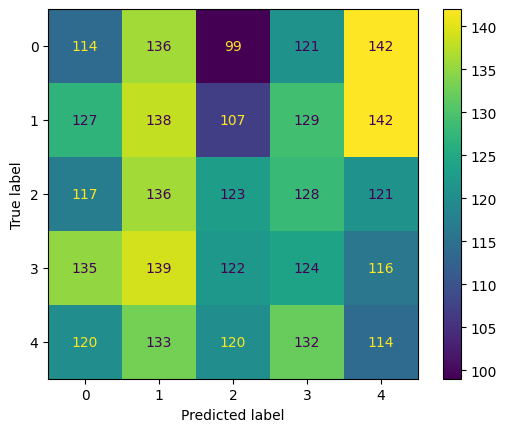

In [84]:
draw_confusion_matrix(ytrue_training_augmented,pred_training_improved_model.argmax(axis=1))# for training

              precision    recall  f1-score   support

           0       0.04      0.05      0.05        20
           1       0.14      0.20      0.16        20
           2       0.33      0.05      0.09        20
           3       0.20      0.05      0.08        20
           4       0.13      0.25      0.17        20

    accuracy                           0.12       100
   macro avg       0.17      0.12      0.11       100
weighted avg       0.17      0.12      0.11       100



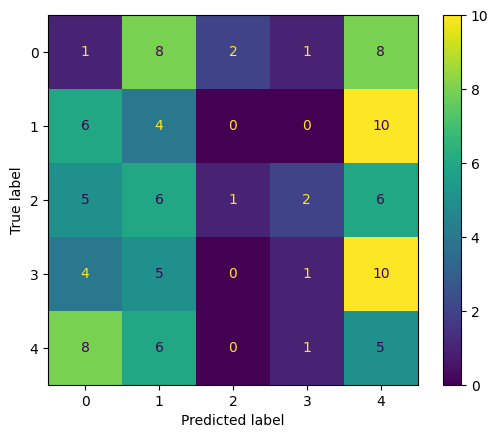

In [85]:
draw_confusion_matrix(ytrue_testing,pred_testing_improved_model.argmax(axis=1))# for testing

              precision    recall  f1-score   support

           0       0.26      0.28      0.27       172
           1       0.20      0.38      0.26       141
           2       0.32      0.05      0.09       159
           3       0.16      0.06      0.09       147
           4       0.22      0.32      0.26       164

    accuracy                           0.22       783
   macro avg       0.23      0.22      0.19       783
weighted avg       0.23      0.22      0.19       783



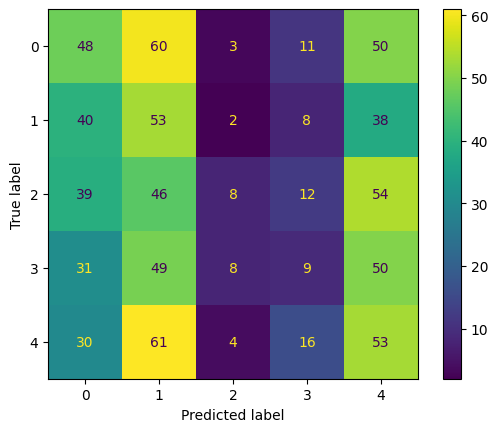

In [86]:
draw_confusion_matrix(ytrue_validation_augmented,pred_validation_improved_model.argmax(axis=1))